In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,Callback, EarlyStopping, ReduceLROnPlateau
from keras import backend as K
import tensorflow as tf
import pickle as pkl
from keras.layers import Dense
import pickle
from tqdm import tqdm
import random
random.seed(123)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
with open("/content/drive/My Drive/Kaggle/train.pkl", "rb") as f1:
    x_train, y_train = pkl.load(f1)

In [ ]:

with open("/content/drive/My Drive/Kaggle/test.pkl", "rb") as f2:
    x_test, y_test = pkl.load(f2)


In [ ]:
with open("/content/drive/My Drive/Kaggle/val.pkl", "rb") as f3:
    x_val, y_val = pkl.load(f3)

In [ ]:
batch_size=16
train_datagen = ImageDataGenerator(
        rescale=1.0/255,  
        height_shift_range= 0.05, 
        width_shift_range=0.1, 
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_batch = train_datagen.flow(x_train,y_train,batch_size=batch_size,shuffle=True)
test_batch = test_datagen.flow(x_test,y_test,batch_size=batch_size,shuffle=False)
val_batch = train_datagen.flow(x_val,y_val,batch_size=batch_size,shuffle=False)

In [ ]:
model5=Sequential()
model5.add(Conv2D(32,(3,3),activation='relu', input_shape=(128, 128, 3),padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Flatten())
model5.add(Dropout(0.3))
model5.add(Dense(4,activation='softmax'))
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [ ]:
model5.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [ ]:
file_path="/content/drive/My Drive/Colab Notebooks/best1.hdf5"
llr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,verbose=1, mode='auto',patience=5,min_delta=0.0001,min_lr=1e-5, cooldown=0)
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor="val_loss", mode='auto', patience=10,restore_best_weights=True)
callbacks_list = [llr,checkpoint,early]

In [ ]:
history=model5.fit_generator(train_batch, validation_data=val_batch, epochs=100, validation_steps= x_val.shape[0] // batch_size, 
                       steps_per_epoch= x_train.shape[0] // batch_size, callbacks=[callbacks_list], verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1723/1723 [==============================] - ETA: 0s - loss: 1.2374 - accuracy: 0.5814
Epoch 00001: val_loss improved from inf to 0.86085, saving model to /content/drive/My Drive/Colab Notebooks/best1.hdf5
1723/1723 [==============================] - 135s 78ms/step - loss: 1.2374 - accuracy: 0.5814 - val_loss: 0.8609 - val_accuracy: 0.6980
Epoch 2/100
1349/1723 [======================>.......] - ETA: 23s - loss: 0.6702 - accuracy: 0.7597WARNING:tensorflow:From <ipython-input-12-4ff2171517af>:2: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1723/1723 [==============================] - ETA: 0s - loss: 1.2374 - accuracy: 0.5814
Epoch 00001: val_loss improved from inf to 0.86085, saving model to /content/drive/My Drive/Colab Notebooks/best1.h

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(18,9))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/accuracy_curve1.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/loss_curve1.png')

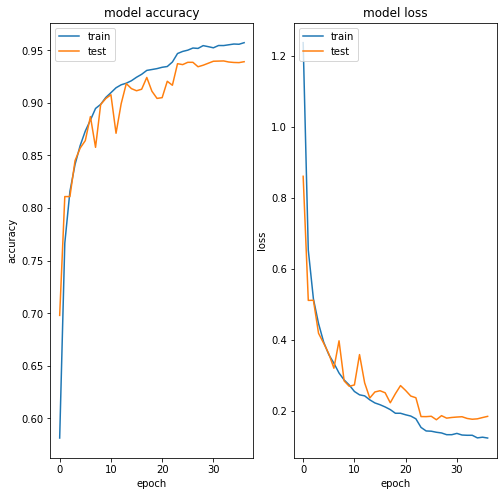

In [ ]:
plot_learning_curve(history)
plt.show()

In [ ]:
model5.load_weights("/content/drive/My Drive/Colab Notebooks/best1.hdf5")
score=model5.evaluate(test_batch)
print(score[1])

61/61 [==============================] - 1s 8ms/step - loss: 0.1227 - accuracy: 0.9690
0.9690082669258118


In [ ]:
y_pred = model5.predict_generator(test_batch,steps = 968)
Y_pred = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.94      1.00      0.97       242
         DME       1.00      0.90      0.95       242
      DRUSEN       0.96      0.98      0.97       242
      Normal       0.98      0.99      0.99       242

    accuracy                           0.97       968
   macro avg       0.97      0.97      0.97       968
weighted avg       0.97      0.97      0.97       968



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[242   0   0   0]
 [ 12 218   7   5]
 [  4   0 238   0]
 [  0   0   2 240]]


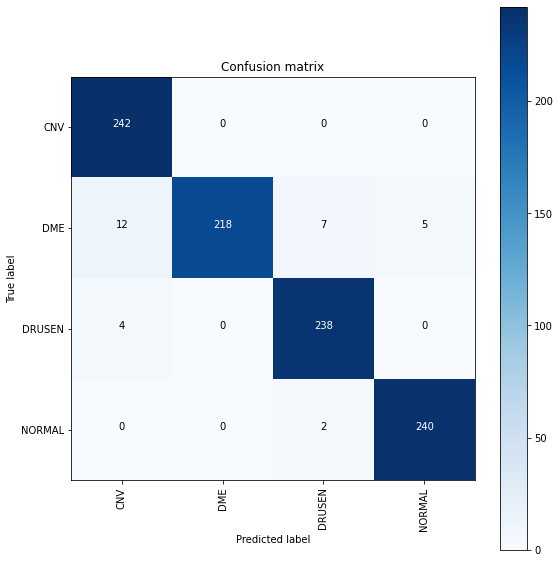

In [ ]:
# confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [ ]:
model6=Sequential()
model6.add(Conv2D(32,(3,3),activation='relu', input_shape=(128, 128, 3),padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dense(256, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.4))
model6.add(Dense(4,activation='softmax'))
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [ ]:
model_img_file = '/content/drive/My Drive/Colab Notebooks/model-7c1-1.png'
tf.keras.utils.plot_model(model6, to_file=model_img_file, show_shapes=True, show_layer_names=True)
plt.savefig(model_img_file )

<Figure size 432x288 with 0 Axes>

In [ ]:
model6.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [ ]:
file_path="/content/drive/My Drive/Colab Notebooks/best5.hdf5"
llr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,verbose=1, mode='auto',patience=5,min_delta=0.0001,min_lr=1e-5, cooldown=0)
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor="val_loss", mode='auto', patience=10,restore_best_weights=True)
callbacks_list = [llr,checkpoint,early]

In [ ]:
history=model6.fit_generator(train_batch, validation_data=val_batch, epochs=100, validation_steps= x_val.shape[0] // batch_size, 
                       steps_per_epoch= x_train.shape[0] // batch_size, callbacks=[callbacks_list], verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1723/1723 [==============================] - ETA: 0s - loss: 1.3992 - accuracy: 0.4874
Epoch 00001: val_loss improved from inf to 0.84955, saving model to /content/drive/My Drive/Colab Notebooks/best5.hdf5
1723/1723 [==============================] - 126s 73ms/step - loss: 1.3992 - accuracy: 0.4874 - val_loss: 0.8496 - val_accuracy: 0.6687
Epoch 2/100
1723/1723 [==============================] - ETA: 0s - loss: 0.8720 - accuracy: 0.6711
Epoch 00002: val_loss did not improve from 0.84955
1723/1723 [==============================] - 125s 73ms/step - loss: 0.8720 - accuracy: 0.6711 - val_loss: 0.9954 - val_accuracy: 0.6295
Epoch 3/100
1723/1723 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.7528
Epoch 00003: val_loss improved from 0.84955 to 0.66657, saving model to /content/drive/My Drive/Colab Notebooks/best5.hdf5
1723/1723 [==============================] - 129s 75ms/step - 

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/accuracy_curve2.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/loss_curve2.png')

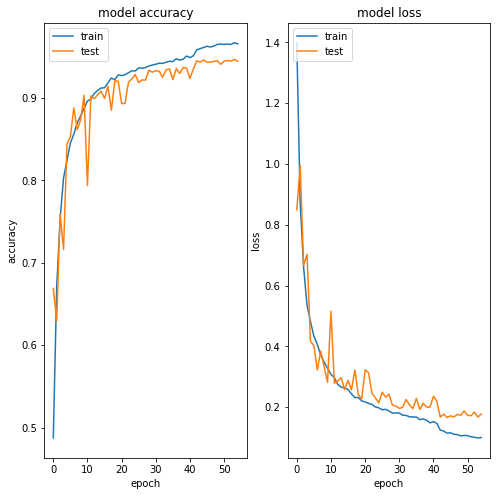

In [ ]:
plot_learning_curve(history)
plt.show()

In [ ]:
model6.load_weights("/content/drive/My Drive/Colab Notebooks/best5.hdf5")
score=model6.evaluate(test_batch)
print(score[1])

61/61 [==============================] - 1s 9ms/step - loss: 0.0701 - accuracy: 0.9814
0.9814049601554871


In [ ]:
y_pred = model6.predict_generator(test_batch,steps = 968)
Y_pred = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.95      1.00      0.97       242
         DME       1.00      0.95      0.97       242
      DRUSEN       0.98      0.98      0.98       242
      Normal       1.00      0.99      1.00       242

    accuracy                           0.98       968
   macro avg       0.98      0.98      0.98       968
weighted avg       0.98      0.98      0.98       968



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/confusion2.png')

--------------------
| Confusion Matrix |
--------------------

 [[242   0   0   0]
 [ 10 230   2   0]
 [  4   0 238   0]
 [  0   0   2 240]]


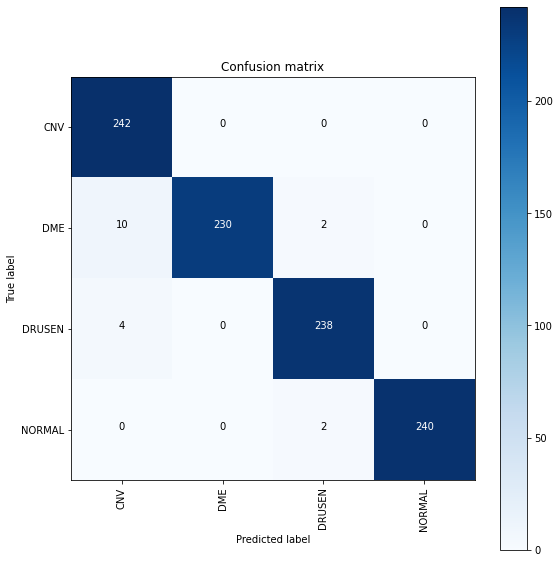

In [ ]:
# confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [ ]:
model6.save('/content/drive/My Drive/Colab Notebooks/7c1-0001')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/7c1-0001/assets


In [ ]:
model7=Sequential()
model7.add(Conv2D(32,(3,3),activation='relu', input_shape=(128, 128, 3),padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Flatten())
model7.add(Dense(512, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dense(256, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.4))
model7.add(Dense(4,activation='softmax'))
model7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [ ]:
model_img_file = '/content/drive/My Drive/Colab Notebooks/model-7c1-2.png'
tf.keras.utils.plot_model(model7, to_file=model_img_file, show_shapes=True, show_layer_names=True)
plt.savefig(model_img_file )

<Figure size 432x288 with 0 Axes>

In [ ]:
model7.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [ ]:
file_path="/content/drive/My Drive/Colab Notebooks/best6.hdf5"
llr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,verbose=1, mode='auto',patience=5,min_delta=0.0001,min_lr=1e-6, cooldown=0)
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor="val_loss", mode='auto', patience=15,restore_best_weights=True)
callbacks_list = [llr,checkpoint,early]

In [ ]:
history=model7.fit_generator(train_batch, validation_data=val_batch, epochs=100, validation_steps= x_val.shape[0] // batch_size, 
                       steps_per_epoch= x_train.shape[0] // batch_size, callbacks=[callbacks_list], verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1723/1723 [==============================] - ETA: 0s - loss: 1.4694 - accuracy: 0.4591
Epoch 00001: val_loss improved from inf to 1.01112, saving model to /content/drive/My Drive/Colab Notebooks/best6.hdf5
1723/1723 [==============================] - 127s 74ms/step - loss: 1.4694 - accuracy: 0.4591 - val_loss: 1.0111 - val_accuracy: 0.6116
Epoch 2/100
1723/1723 [==============================] - ETA: 0s - loss: 0.8920 - accuracy: 0.6609
Epoch 00002: val_loss did not improve from 1.01112
1723/1723 [==============================] - 126s 73ms/step - loss: 0.8920 - accuracy: 0.6609 - val_loss: 2.8429 - val_accuracy: 0.3961
Epoch 3/100
1723/1723 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.7575
Epoch 00003: val_loss improved from 1.01112 to 0.76620, saving model to /content/drive/My Drive/Colab Notebooks/best6.hdf5
1723/1723 [==============================] - 128s 74ms/step - 

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/accuracy_curve3.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/loss_curve3.png')

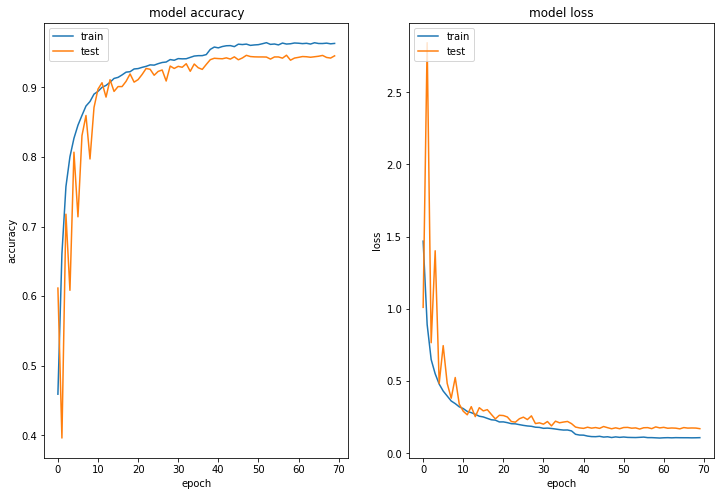

In [ ]:
plot_learning_curve(history)
plt.show()

In [ ]:
model7.load_weights("/content/drive/My Drive/Colab Notebooks/best6.hdf5")
score=model7.evaluate(test_batch)
print(score[1])

61/61 [==============================] - 1s 9ms/step - loss: 0.1139 - accuracy: 0.9690
0.9690082669258118


In [ ]:
y_pred = model7.predict_generator(test_batch,steps = 968)
Y_pred = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.92      1.00      0.96       242
         DME       1.00      0.91      0.95       242
      DRUSEN       0.96      0.98      0.97       242
      Normal       1.00      0.98      0.99       242

    accuracy                           0.97       968
   macro avg       0.97      0.97      0.97       968
weighted avg       0.97      0.97      0.97       968



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('/content/drive/My Drive/Colab Notebooks/confusion3.png')

--------------------
| Confusion Matrix |
--------------------

 [[242   0   0   0]
 [ 16 221   4   1]
 [  4   0 238   0]
 [  0   0   5 237]]


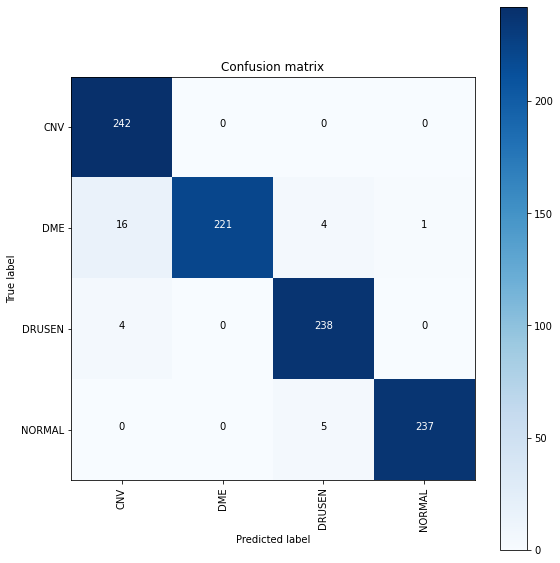

In [ ]:
# confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [ ]:
model7.save('/content/drive/My Drive/Colab Notebooks/7c1-0001-2.h5')